In [1]:
import pandas as pd
import pyodbc
import numpy as np

class get_df:

    def __init__(self):
        self.DB_infos = {"X01" : ("192.168.1.16", "X01", "cm23357868", "86875332")}
        self.querys = {}
        self.db = str()
        self.df_dict =  dict()
        self.w_code_dict = dict()
        self.point_dict = dict()
        self.result_dict = dict()
        
    def db_connect(self, DB_info):
        DB_Host, DB_Name, DB_User, DB_Password = self.DB_infos[DB_info]
        print("Connecting to database using pyodbc...")
        self.db = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server}; SERVER=' + DB_Host + '; DATABASE=' + DB_Name + '; UID=' + DB_User + '; PWD=' + DB_Password)
        print("Succesfully Connected to database using pyodbc!")
      
    def load_data(self, query):
        df =  pd.read_sql(self.querys[query], self.db)
        return df
    @staticmethod
    def make_ETF():
        df ="""SELECT    [日期]
                        ,[股票代號]
                        ,[股票名稱]
                        ,[開盤價]
                        ,[最高價]
                        ,[最低價]
                        ,[收盤價]
                        ,[漲跌]
                        ,[漲幅(%)]
                        ,[振幅(%)]
                        ,[成交量]
                        ,[成交筆數]
                        ,[成交金額(千)]
                        ,[均張]
                        ,[成交量變動(%)]
                        ,[均張變動(%)]
                        ,[股本(百萬)]
                        ,[總市值(億)]
                        ,[週轉率(%)]
                        ,[成交值比重(%)]
                        ,[漲跌停]
                        ,[成交量(股)]
                     
                    FROM [X01].[dbo].[日收盤還原表排行] where  股票代號 like '0%' and 日期 >= '20020101' order by 日期 desc"""
        return df
    @staticmethod
    def make_ETF_detail():
        df ="""SELECT    [年度]
                        ,[股票代號]
                        ,[基金簡稱]
                        ,[ETF類型代號]
                        ,[ETF類型]
                        ,[交易所ETF類型]
                        ,[標的區域代號]
                        ,[標的區域]
                        ,[追蹤指數中文名稱]
                        ,[追蹤指數對應代號]
                        ,[指數追蹤方式]
                        ,[上市上櫃]
                        ,[槓桿倍數]
                        ,[包含外國成份股]
                        ,[是否配息]
                        ,[交易幣別]
                        ,[追蹤指數幣別]
                        ,[交易單位]
                       
                    FROM [X01].[dbo].[ETF基本資料表] where 日期 >= 20020101 order by 日期"""
        return df

In [2]:
sql_base = get_df()
sql_base.db_connect('X01')
sql_base.querys['ETF'] = sql_base.make_ETF()
sql_base.querys['ETF_Detail'] = sql_base.make_ETF_detail()

Connecting to database using pyodbc...
Succesfully Connected to database using pyodbc!


In [3]:
ETF行情表 = sql_base.load_data('ETF')
ETF行情表 = ETF行情表.sort_values(by = ['日期','股票代號']).reset_index(drop = True)
ETF行情表['日期'] = pd.to_datetime(ETF行情表['日期'],format = "%Y%m%d").fillna(0)
ETF行情表 = ETF行情表.set_index('日期')

In [4]:
ETF1 = pd.Series(ETF行情表['股票代號'])
ETFlist = ETF1.sort_values().drop_duplicates()
ETFlist = list(ETFlist)

In [5]:
from tqdm import tqdm
ETF_dict = {str(ETFlist[i]):ETF行情表[ETF行情表['股票代號'] == ETFlist[i]] for i in tqdm(range(len(ETFlist)))}

100%|██████████| 364/364 [00:08<00:00, 43.97it/s]


In [6]:
ETF行情表

,股票代號,股票名稱,開盤價,最高價,最低價,收盤價,漲跌,漲幅(%),振幅(%),成交量,...,成交金額(千),均張,成交量變動(%),均張變動(%),股本(百萬),總市值(億),週轉率(%),成交值比重(%),漲跌停,成交量(股)
日期,,,,,,,,,,,,,,,,,,,,,
2002-01-02,0001,鴻運,7.65,7.80,7.65,7.80,-0.10,-1.27,1.90,38.0,...,296.0,2.9,18.75,-9.38,NaN,NaN,NaN,0.000,NaN,38000.0
2002-01-02,0015,富邦,6.25,6.35,6.20,6.30,0.05,0.80,2.40,1117.0,...,7022.0,16.9,-28.26,4.97,5000.0,31.5,0.22,0.004,0.0,1117000.0
2002-01-02,0023,中小型,12.65,12.75,12.50,12.70,0.05,0.40,1.98,1165.0,...,14735.0,7.8,-20.64,-16.13,NaN,NaN,NaN,0.009,NaN,1165000.0
2002-01-02,0025,大發,7.20,7.20,7.20,7.20,0.00,0.00,0.00,1.0,...,7.0,1.0,-99.12,-91.15,NaN,NaN,NaN,0.000,NaN,1000.0
2002-01-02,0029,富邦店,4.48,4.53,4.42,4.51,0.03,0.67,2.46,1808.0,...,8111.0,13.1,-28.08,0.77,NaN,NaN,NaN,0.005,NaN,1808000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,020035,元大上櫃ESG高息N,6.80,6.80,6.80,6.80,0.05,0.74,0.00,4.0,...,27.0,4.0,-20.00,-20.00,NaN,NaN,NaN,0.000,0.0,4000.0
2023-12-04,020036,元大金融配息N,5.46,5.46,5.46,5.46,0.02,0.37,0.00,6.0,...,33.0,1.5,20.00,-70.00,NaN,NaN,NaN,0.000,0.0,6000.0
2023-12-04,020037,元大金融高股息N,5.61,5.61,5.60,5.60,0.01,0.18,0.18,14.0,...,78.0,2.8,55.56,21.74,NaN,NaN,NaN,0.000,0.0,14000.0


In [7]:
feature_ls = ETF行情表.columns[2:]
ETF行情表 = ETF行情表.reset_index(drop = False)
data_pivots_ls = []
for feature in tqdm(ETF行情表.columns[2:]):
    data_pivot = ETF行情表.pivot('日期','股票代號',feature)
    data_pivots_ls.append(data_pivot)

100%|██████████| 20/20 [00:02<00:00,  6.77it/s]


In [8]:
pivot_dict = {str(ETF行情表.columns[2:][i]):data_pivots_ls[i] for i in range(len(ETF行情表.columns[2:]))}

ETF_dict.update(pivot_dict)

In [9]:
ETF_dict['00929'].columns[2:]

Index(['開盤價', '最高價', '最低價', '收盤價', '漲跌', '漲幅(%)', '振幅(%)', '成交量', '成交筆數',
       '成交金額(千)', '均張', '成交量變動(%)', '均張變動(%)', '股本(百萬)', '總市值(億)', '週轉率(%)',
       '成交值比重(%)', '漲跌停', '成交量(股)'],
      dtype='object')

In [10]:
ETF_dict['0050']

,股票代號,股票名稱,開盤價,最高價,最低價,收盤價,漲跌,漲幅(%),振幅(%),成交量,...,成交金額(千),均張,成交量變動(%),均張變動(%),股本(百萬),總市值(億),週轉率(%),成交值比重(%),漲跌停,成交量(股)
日期,,,,,,,,,,,,,,,,,,,,,
2003-06-30,0050,台灣50,19.21,19.37,19.12,19.20,0.00,0.00,1.29,9930.0,...,367885.0,4.9,NaN,NaN,1160.0,43.0,8.56,0.608,0.0,9930000.0
2003-07-01,0050,台灣50,19.21,19.73,19.21,19.71,0.97,2.62,2.72,14290.0,...,536078.0,6.4,43.91,30.61,1160.0,44.1,12.16,0.499,0.0,14290000.0
2003-07-02,0050,台灣50,19.77,20.11,19.73,20.04,0.64,1.68,1.89,16232.0,...,625637.0,8.5,13.59,32.81,1160.0,44.9,13.93,0.426,0.0,16232000.0
2003-07-03,0050,台灣50,21.03,21.03,20.10,20.20,0.31,0.80,4.63,16839.0,...,661217.0,7.6,3.74,-10.59,1200.0,46.8,14.13,0.398,0.0,16839000.0
2003-07-04,0050,台灣50,20.25,20.33,20.07,20.33,0.26,0.67,1.31,12491.0,...,487754.0,8.3,-25.82,9.21,1230.0,48.3,10.10,0.408,0.0,12491000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28,0050,元大台灣50,130.40,131.80,130.30,131.25,0.90,0.69,1.15,9871.0,...,1294408.0,1.2,-0.26,50.00,22915.0,3007.6,0.43,0.434,0.0,9871026.0
2023-11-29,0050,元大台灣50,131.30,132.20,131.05,131.15,-0.10,-0.08,0.88,6856.0,...,901480.0,1.1,-30.54,-8.33,22930.0,3007.3,0.30,0.275,0.0,6856869.0
2023-11-30,0050,元大台灣50,131.30,131.50,130.65,131.35,0.20,0.15,0.65,11141.0,...,1461693.0,1.5,62.50,36.36,22895.0,3007.3,0.49,0.353,0.0,11141866.0


In [11]:
responseETF = pd.read_excel(r'C:\Users\larryx30\Desktop\\股票型ETF代碼.xlsx')
responseETF['股票代號'] = '00'+responseETF['股票代號'].astype(str)
responseETF.index = responseETF.index+1
SETF = responseETF['股票代號']

In [12]:
ETFDDW = {}
for j in tqdm(ETFlist):
    ETFDDW[str(j)] = ETF_dict[str(j)].resample('W-FRI').agg({'開盤價':'first', '最高價':'max', '最低價':'min', '收盤價':'last', '成交金額(千)':'sum'\
                                                           }).fillna(method = 'pad' ,axis = 0)

100%|██████████| 364/364 [00:02<00:00, 154.52it/s]


<AxesSubplot:xlabel='日期'>

C:\Users\larryx30\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\larryx30\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\larryx30\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\larryx30\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


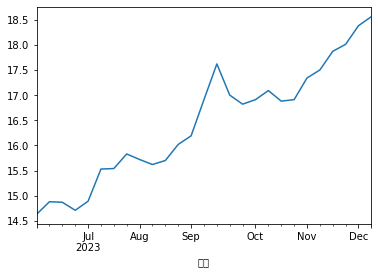

In [13]:
ETFDDW['00929']['收盤價'].plot()

In [14]:
#ETFlist

100%|██████████| 48/48 [00:04<00:00,  9.65it/s]


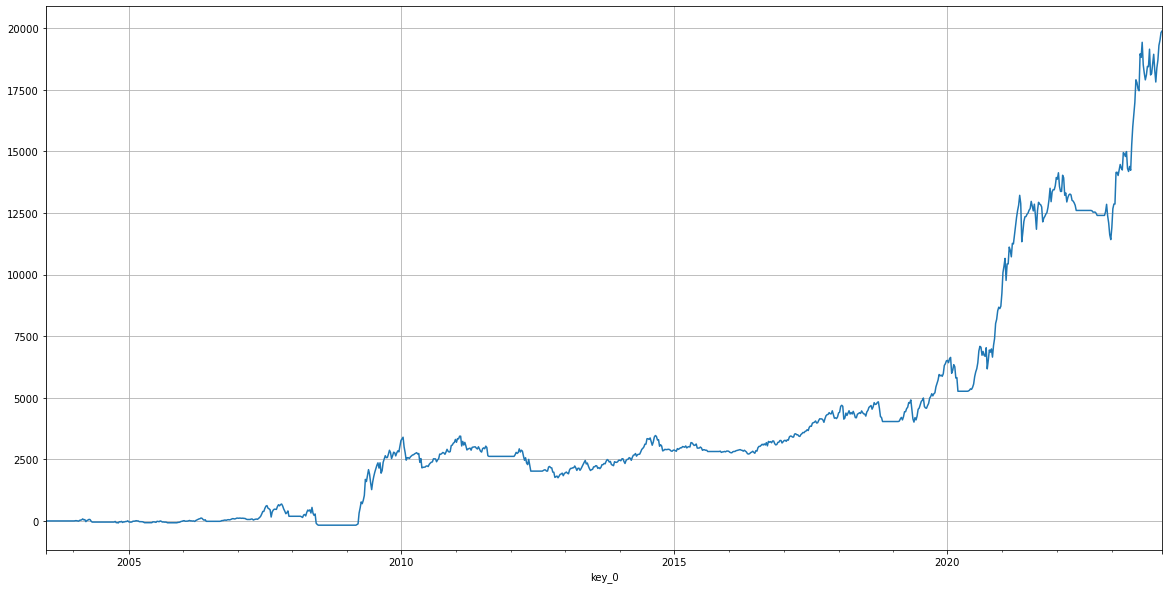

In [15]:
import talib
ERROR = []
trr = pd.DataFrame()
pz = pd.DataFrame()

for x in tqdm(SETF):
    
    ETFDDW[str(x)]['MAX52'] = ETFDDW[str(x)]["收盤價"].rolling(5).max()
    ETFDDW[str(x)]["MAX52S"] = ETFDDW[str(x)]["MAX52"].shift(1)
    ETFDDW[str(x)]["20MA"] = talib.MA(ETFDDW[str(x)]["收盤價"].dropna(), timeperiod=20, matype=0)
    ETFDDW[str(x)]["20MAS"] = ETFDDW[str(x)]["20MA"].shift(1)
    ETFDDW[str(x)]["5MA"] = talib.MA(ETFDDW[str(x)]["收盤價"].dropna(), timeperiod=5, matype=0)
    ETFDDW[str(x)]["5MAS"] = ETFDDW[str(x)]["5MA"].shift(1)
    
    ETFDDW[str(x)]["DR"] = ((ETFDDW[str(x)]["收盤價"] - ETFDDW[str(x)]["收盤價"].shift(1))/ETFDDW[str(x)]["收盤價"].shift(1))*100
    
    
    KPBS = 0
    KPBUY =[]
    for z in range(len(ETFDDW[str(x)])):

        if ETFDDW[str(x)]["收盤價"].iloc[z]  > ETFDDW[str(x)]["MAX52S"].iloc[z] and ETFDDW[str(x)]['成交金額(千)'].iloc[z] > 20000 \
        and ETFDDW[str(x)]["最低價"].iloc[z] > ETFDDW[str(x)]["20MAS"].iloc[z] :
        
            KPBS = 1

        elif ETFDDW[str(x)]["收盤價"].iloc[z] < ETFDDW[str(x)]["最低價"].rolling(1).min().shift(1).iloc[z]  and \
         (( ETFDDW[str(x)]['收盤價'].iloc[z] < ETFDDW[str(x)]['收盤價'].rolling(15).min().shift(1).iloc[z]) ) :
         
            KPBS = 0
            
        KPBUY.append(KPBS)
    ETFDDW[str(x)]["KPBUY"] = KPBUY
    ETFDDW[str(x)]["KPBUYS"] = ETFDDW[str(x)]["KPBUY"].shift(1)
    pzb = ETFDDW[str(x)]["KPBUYS"]  
    pzb.name = str(x)
    pzbs = ETFDDW[str(x)]["KPBUY"]
    pzbs.name = str(x)
    ETFDDW[str(x)]["KPRR"] = ETFDDW[str(x)]["DR"] * ETFDDW[str(x)]["KPBUYS"].dropna().astype(int)
    PT = ETFDDW[str(x)]["KPRR"]
    PT.name = str(x)
    if len(trr) == 0:
        trr = PT
    else:
        trr = pd.merge(trr,PT,left_on = trr.index,right_on = PT.index,how = 'outer')
        trr.set_index('key_0',inplace = True)
    if len(pz) == 0:
        pz = pzbs
    else:
        pz = pd.merge(pz,pzbs,left_on = pz.index,right_on = pzbs.index,how = 'outer')
        pz.set_index('key_0',inplace = True)

trrb =(trr*10).replace(np.inf,0).sort_index().sum(axis = 1).cumsum().plot(figsize=(20, 10),grid = True)


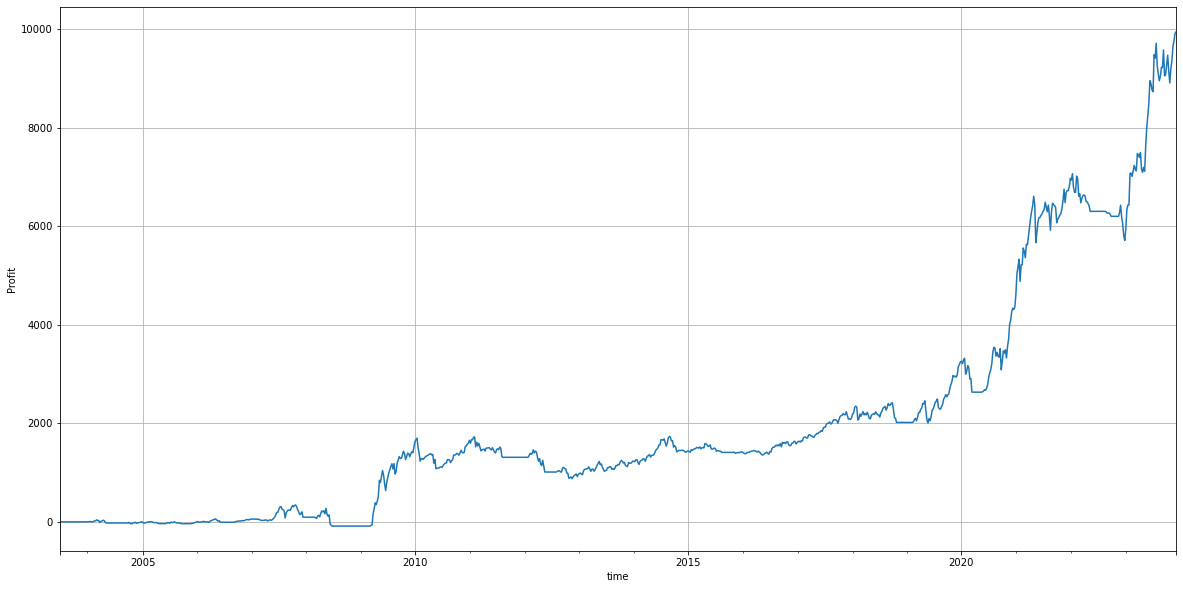

In [16]:
import matplotlib.pyplot as plt
ETF損益圖 = (trr*5).replace(np.inf,0).sort_index().sum(axis = 1).cumsum().plot(figsize=(20,10),grid = True)

plt.xlabel("time")
plt.ylabel("Profit")
plt.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF.png')

6.284910965323337
0.0
37.0


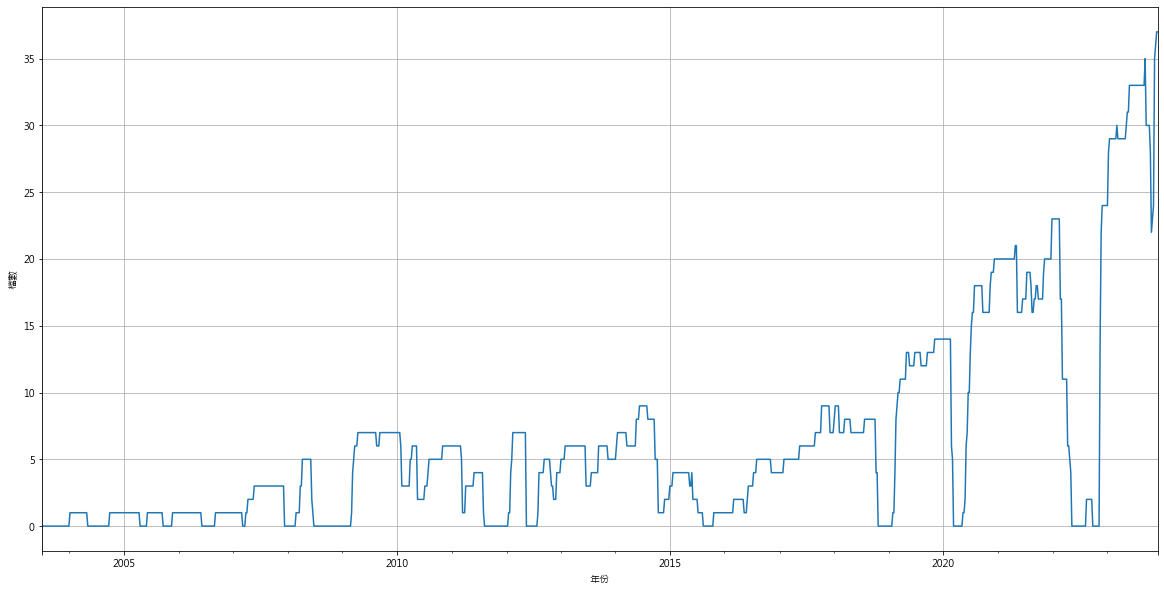

In [17]:
pz1 = pz.sort_index()
f = lambda x :float(x)
pz2 = pz1.applymap(f)
pz3 = pz2.sum(axis=1)
pz4 = pz3.groupby(pd.Grouper(freq='1W')).tail(1)
plt.rcParams['font.family'] = ['Microsoft JhengHei'] # 中文標籤
plt.rcParams['axes.unicode_minus'] = False # 負號
print(pz4.mean())
print(pz4.min())
print(pz4.max())
pz4.plot(figsize=(20, 10),grid = True)
plt.xlabel("年份")
plt.ylabel("檔數")
plt.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF部位變化.png')

In [18]:
當週日期 = trr.index[-1]
前週日期 = trr.index[-2]

In [19]:
ETF持有部位 = pz2.loc[當週日期][(pz2.loc[當週日期]==1)]
ETF買進 = pz2.loc[當週日期][(pz2.loc[當週日期]==1) & (pz2.loc[前週日期]==0)]
ETF賣出 = pz2.loc[當週日期][(pz2.loc[當週日期]==0) & (pz2.loc[前週日期]==1)]
print("ETF買進標的")
print(ETF買進)
print("ETF買進檔數" , len(ETF買進))
print("ETF持有部位數目" , len(ETF持有部位))
print("ETF賣出部位")
print(ETF賣出)
print("ETF賣出檔數" , len(ETF賣出))

ETF買進標的
Series([], Name: 2023-12-08 00:00:00, dtype: float64)
ETF買進檔數 0
ETF持有部位數目 37
ETF賣出部位
Series([], Name: 2023-12-08 00:00:00, dtype: float64)
ETF賣出檔數 0


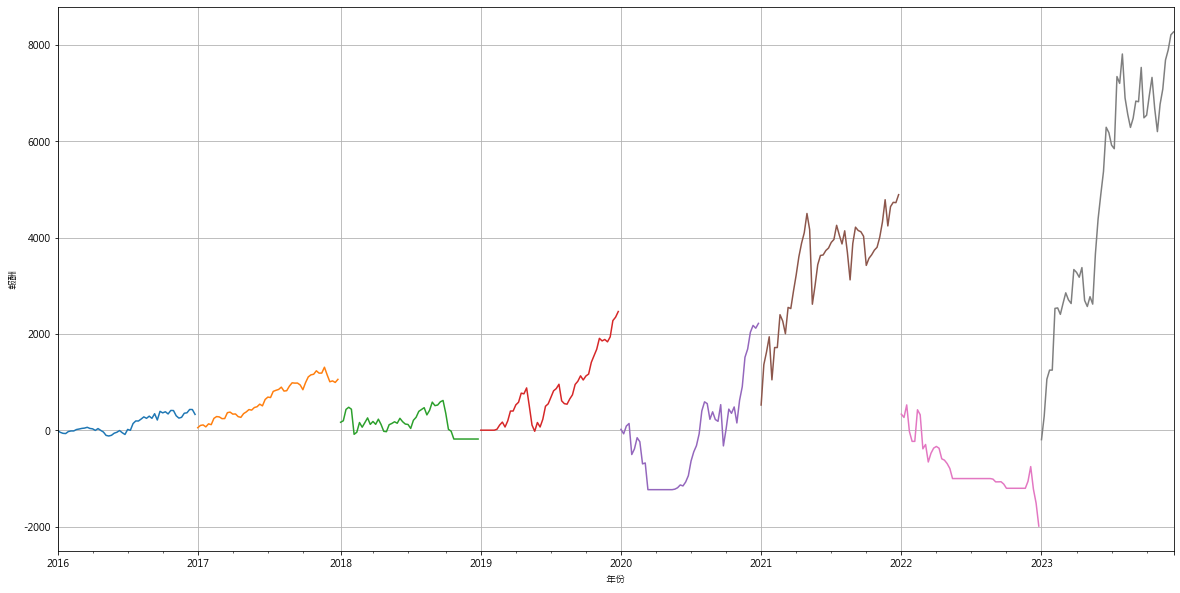

In [20]:
yl = ['2016','2017','2018','2019','2020','2021','2022','2023']
for h in yl :
    trrt = (trr*10).groupby(pd.Grouper(freq='1W')).sum().sum(axis=1)[str(h)].cumsum()
    trrtfig = (trrt).plot(figsize=(20, 10),grid = True)
trrtfig = plt.gcf()

plt.xlabel("年份")
plt.ylabel("報酬")
trrtfig.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF歷年損益.png')

In [21]:
print('ETF持有部位')
print(list(ETF持有部位.index))

ETF持有部位
['0050', '0051', '0052', '0055', '0056', '006208', '00690', '00692', '00701', '00713', '00728', '00730', '00731', '00850', '00878', '00881', '00888', '00891', '00892', '00894', '00900', '00901', '00904', '00905', '00907', '00912', '00913', '00915', '00918', '00919', '00921', '00922', '00923', '00927', '00928', '00929', '00930']


In [22]:
total = (trr*10).replace(np.inf,0).sort_index().sum(axis = 1)
position = pz3.groupby(pd.Grouper(freq='1W')).tail(1)

In [23]:
total

key_0
2003-07-04      0.000000
2003-07-11      0.000000
2003-07-18      0.000000
2003-07-25      0.000000
2003-08-01      0.000000
                 ...    
2023-11-10    313.487441
2023-11-17    602.645100
2023-11-24    209.163214
2023-12-01    314.739622
2023-12-08     60.698114
Length: 1067, dtype: float64

In [24]:
position1= position +48

In [25]:
averr = (total/position1).fillna(0)

In [26]:
averr.cumsum()

key_0
2003-07-04      0.000000
2003-07-11      0.000000
2003-07-18      0.000000
2003-07-25      0.000000
2003-08-01      0.000000
                 ...    
2023-11-10    268.913079
2023-11-17    276.173863
2023-11-24    278.663902
2023-12-01    282.366721
2023-12-08    283.080816
Length: 1067, dtype: float64

<AxesSubplot:xlabel='key_0'>

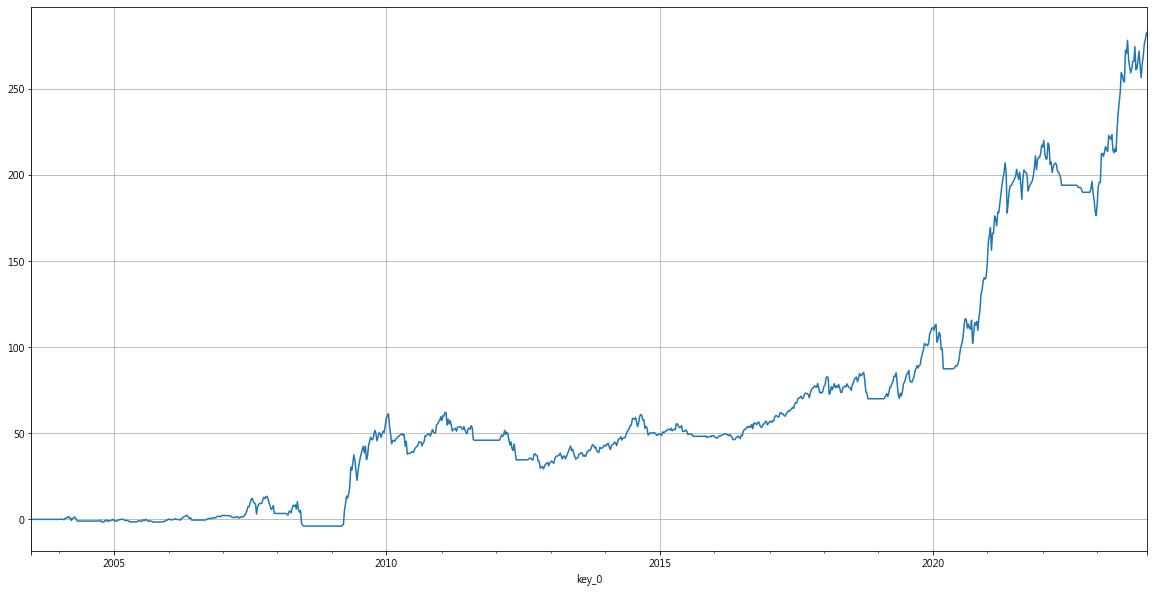

In [27]:
averr.cumsum().plot(figsize=(20, 10),grid = True)

In [28]:
ETF單週損益 = (trr*10).replace(np.inf,0).sort_index().sum(axis = 1)
ETF單週損益 = pd.DataFrame(ETF單週損益).reset_index().rename(columns = {'key_0':'日期',0:'long損益'})
ETF單週損益.to_excel(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF單週損益.xlsx')
ETF放空單週損益 = pd.read_excel(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF放空單週損益.xlsx',index_col = 0)
主關鍵點損益 = pd.read_excel(r'C:\Users\larryx30\larryx30\每週買賣報表\分年資料.xlsx')
ETF放空部位 = pd.read_excel(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF空單部位變化.xlsx',index_col = 0)
ETF總部位 = pz4*10000000
ETF單週損益 = ETF單週損益.merge(ETF放空單週損益.reset_index().rename(columns = {'key_0':'日期',0:'short損益'}),on = '日期')
ETF單週損益 = ETF單週損益.merge(ETF總部位.reset_index().rename(columns = {'key_0':'日期',0:'ETF總部位'}),on = '日期')
ETF單週損益 = ETF單週損益.merge(ETF放空部位.reset_index().rename(columns = {'key_0':'日期',0:'放空部位'}),on = '日期')
ETF單週損益 = ETF單週損益.merge(主關鍵點損益.reset_index().rename(columns = {'key_0':'日期',0:'主關鍵點損益'}),on = '日期')
ETF單週損益['ETF_long_short_損益'] = ETF單週損益['long損益'] + ETF單週損益['short損益']*1
ETF單週損益['淨部位變化'] = ETF單週損益['ETF總部位'] + (ETF單週損益['放空部位']*1000000)
ETF單週損益['關鍵點+ETF損益'] = ETF單週損益['ETF_long_short_損益'] + ETF單週損益['主關鍵點損益']
pd.DataFrame(ETF單週損益)
ETF單週損益 = ETF單週損益.set_index('日期')

In [29]:
ETF單週損益

,long損益,short損益,ETF總部位,放空部位,index,主關鍵點損益,ETF_long_short_損益,淨部位變化,關鍵點+ETF損益
日期,,,,,,,,,
2003-07-04,0.000000,0.000000,0.0,-1,78,200.004558,0.000000,-1000000.0,200.004558
2003-07-11,0.000000,-2.269044,0.0,-1,79,221.496651,-2.269044,-1000000.0,219.227607
2003-07-18,0.000000,-6.022187,0.0,0,80,134.248120,-6.022187,0.0,128.225933
2003-07-25,0.000000,0.000000,0.0,-1,81,156.449315,0.000000,-1000000.0,156.449315
2003-08-01,0.000000,-2.787947,0.0,0,82,-12.260330,-2.787947,0.0,-15.048277
...,...,...,...,...,...,...,...,...,...
2023-11-10,313.487441,16.128755,240000000.0,-60,1140,134.919062,329.616196,180000000.0,464.535258
2023-11-17,602.645100,-280.862971,350000000.0,-23,1141,23.444824,321.782129,327000000.0,345.226953
2023-11-24,209.163214,-48.198041,360000000.0,-11,1142,294.740157,160.965173,349000000.0,455.705330


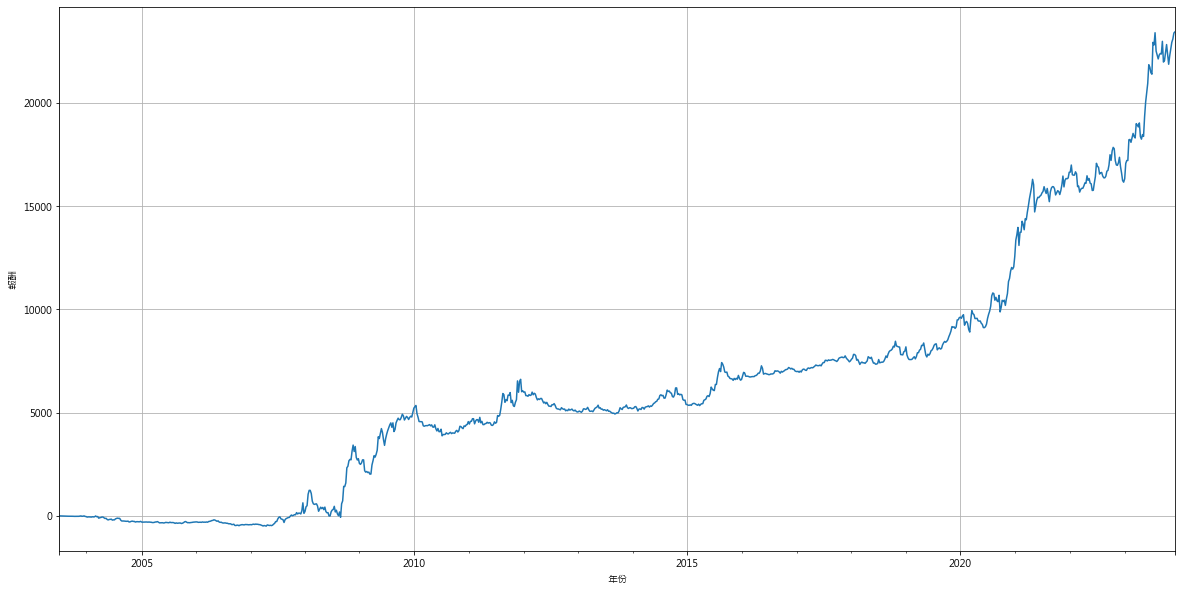

In [30]:
ETF單週損益['ETF_long_short_損益'].cumsum().plot(figsize=(20, 10),grid = True)

plt.xlabel("年份")
plt.ylabel("報酬")
plt.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\ETFLS圖.png')

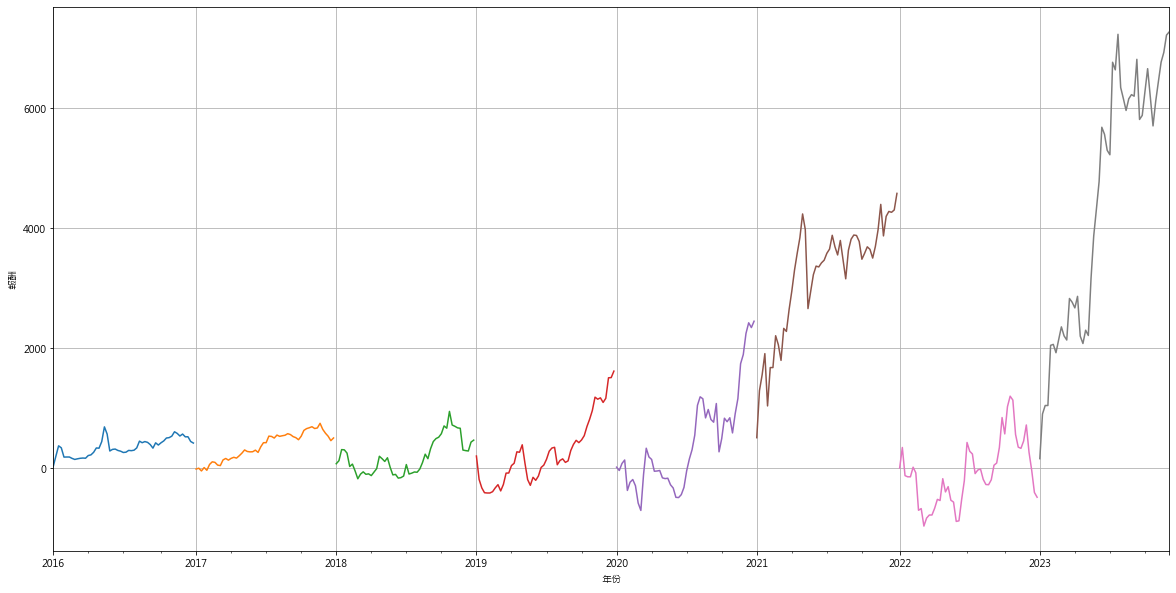

In [31]:
LS = ['2016','2017','2018','2019','2020','2021','2022','2023']
for h in LS :
    trrtLS = (ETF單週損益['ETF_long_short_損益'])[str(h)].cumsum()
    trrtfigLS = (trrtLS).plot(figsize=(20, 10),grid = True)
trrtfig = plt.gcf()

plt.xlabel("年份")
plt.ylabel("報酬")
trrtfig.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\ETFLS歷年損益.png')

Text(0, 0.5, '報酬')

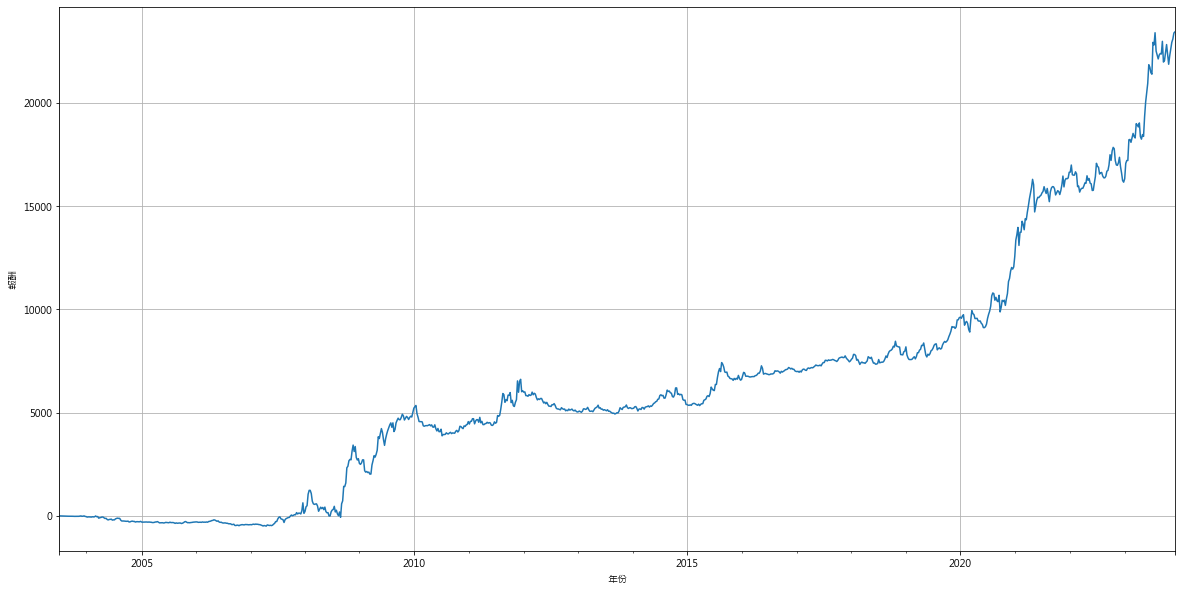

In [32]:
ETF單週損益['ETF_long_short_損益'].cumsum().plot(figsize=(20, 10),grid = True)

plt.xlabel("年份")
plt.ylabel("報酬")

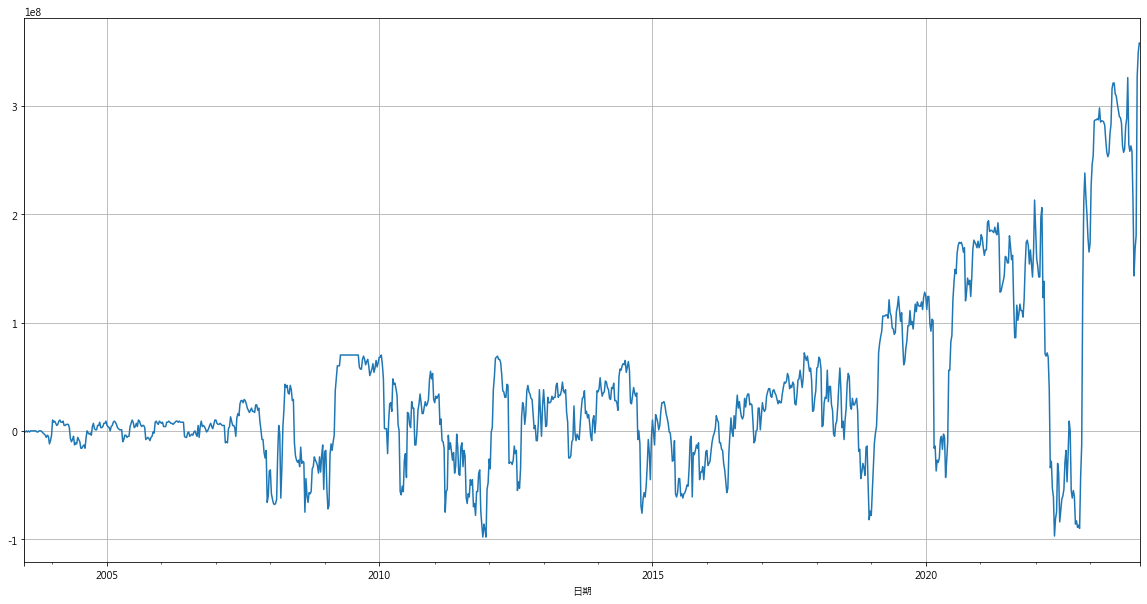

In [33]:
ETF單週損益['淨部位變化'].plot(figsize = (20,10),grid = True)
plt.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF淨部位變化.png')

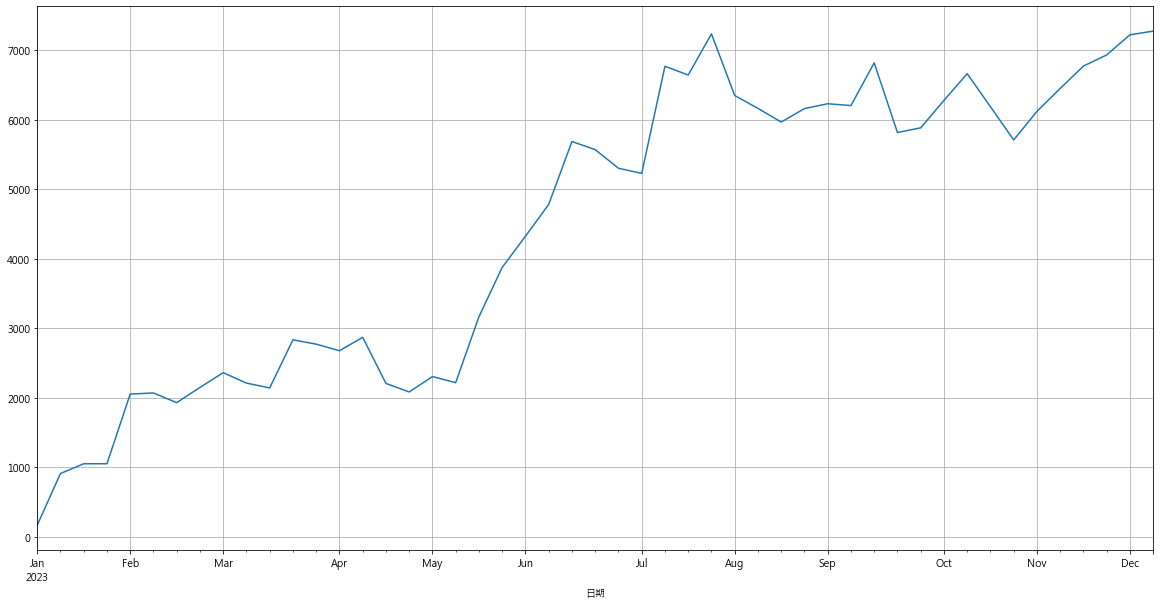

In [34]:
ETF單週損益['ETF_long_short_損益']['2023':].cumsum().plot(figsize = (20,10),grid = True)
plt.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\ETF最終損益.png')

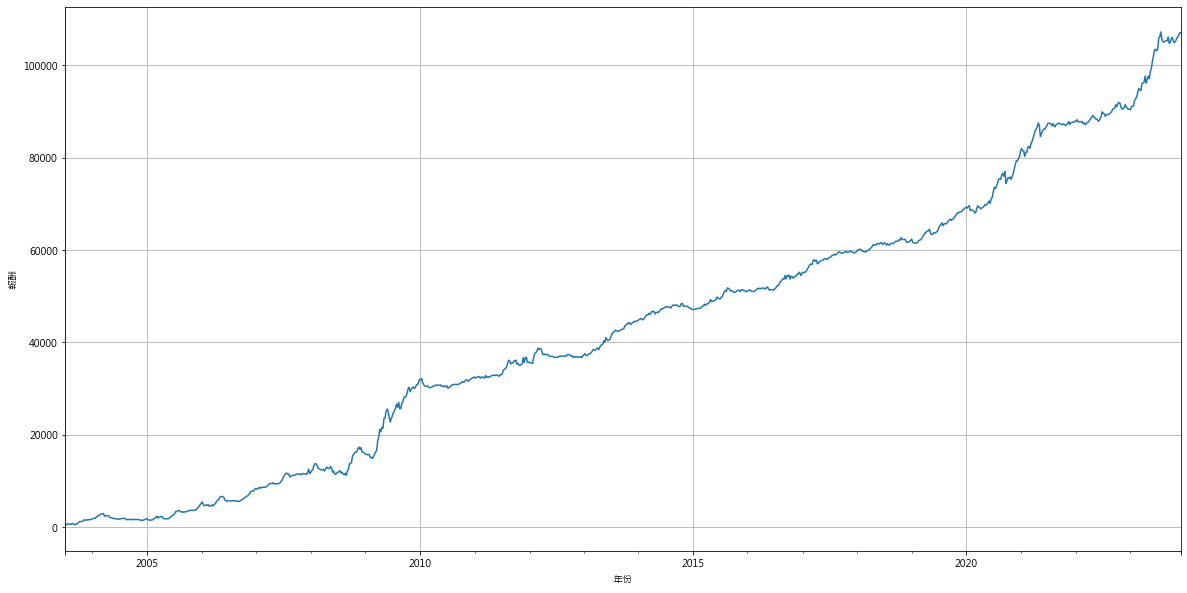

In [35]:
ETF單週損益['關鍵點+ETF損益'].cumsum().plot(figsize=(20, 10),grid = True)

plt.xlabel("年份")
plt.ylabel("報酬")
plt.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\關鍵點+ETF圖.png')

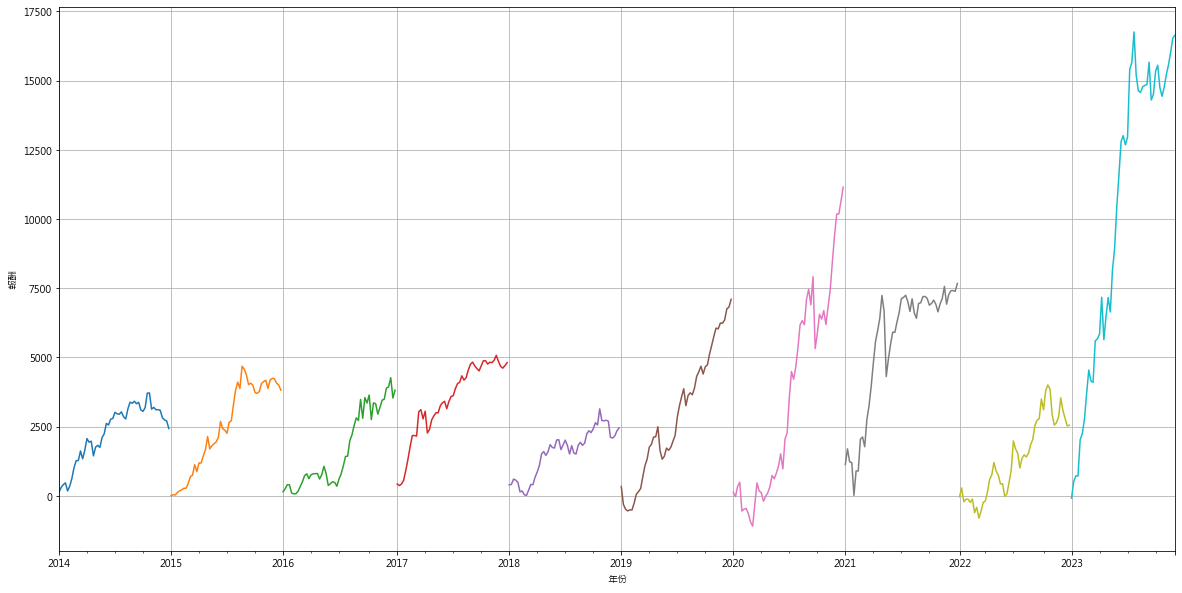

In [36]:
LS = ['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
for h in LS :
    trrtTTS = (ETF單週損益['關鍵點+ETF損益'])[str(h)].cumsum()
    trrtfigTTS = (trrtTTS).plot(figsize=(20, 10),grid = True)
trrtfigTTS = plt.gcf()

plt.xlabel("年份")
plt.ylabel("報酬")
trrtfigTTS.savefig(r'C:\Users\larryx30\larryx30\每週買賣報表\關鍵點+ETF歷年損益.png')

In [37]:
responseBETF = pd.read_excel(r'C:\Users\larryx30\Desktop\\債券型ETF代碼.xlsx')
responseBETF['股票代號'] = responseBETF['股票代號'].astype(str)
responseBETF.index = responseBETF.index+1
BETF = responseBETF['股票代號']

In [38]:
BETF

1     00679B
2     00694B
3     00695B
4     00696B
5     00697B
6     00719B
7     00764B
8     00768B
9     00779B
10    00795B
11    00831B
12    00856B
13    00857B
14    00859B
15    00864B
16    00865B
Name: 股票代號, dtype: object

100%|██████████| 16/16 [00:01<00:00,  9.59it/s]


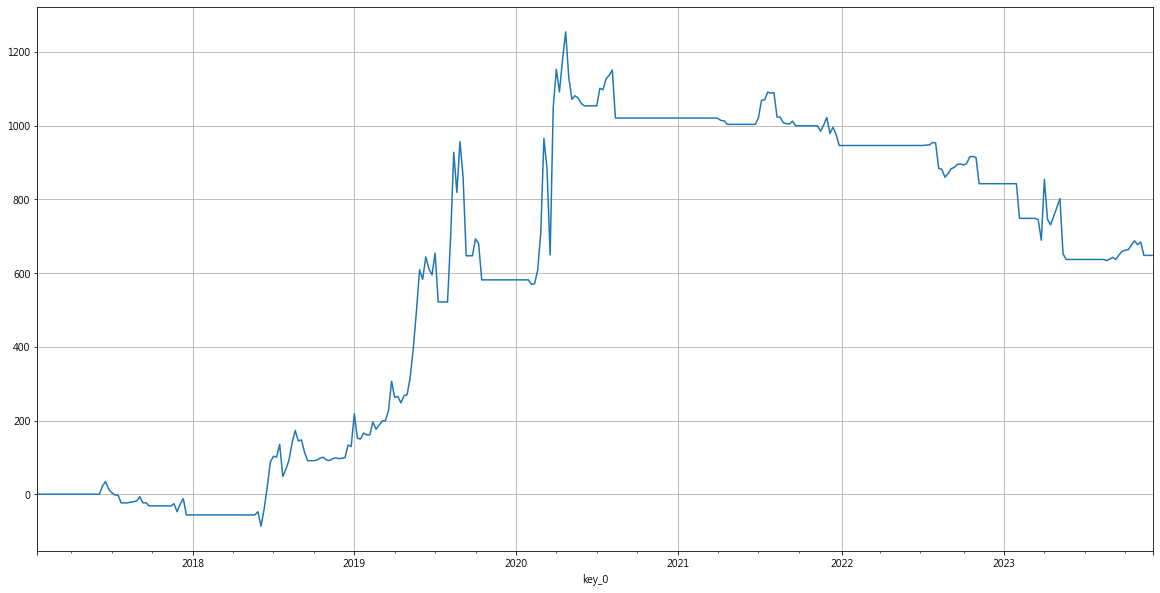

In [39]:
import talib
ERROR = []
Btrr = pd.DataFrame()
Bpz = pd.DataFrame()

for x in tqdm(BETF):
    
    ETFDDW[str(x)]['MAX52'] = ETFDDW[str(x)]["收盤價"].rolling(2).max()
    ETFDDW[str(x)]["MAX52S"] = ETFDDW[str(x)]["MAX52"].shift(1)
    ETFDDW[str(x)]["20MA"] = talib.MA(ETFDDW[str(x)]["收盤價"].dropna(), timeperiod=20, matype=0)
    ETFDDW[str(x)]["20MAS"] = ETFDDW[str(x)]["20MA"].shift(1)
    ETFDDW[str(x)]["5MA"] = talib.MA(ETFDDW[str(x)]["收盤價"].dropna(), timeperiod=5, matype=0)
    ETFDDW[str(x)]["5MAS"] = ETFDDW[str(x)]["5MA"].shift(1)
    
    ETFDDW[str(x)]["DR"] = ((ETFDDW[str(x)]["收盤價"] - ETFDDW[str(x)]["收盤價"].shift(1))/ETFDDW[str(x)]["收盤價"].shift(1))*100
    
    
    BKPBS = 0
    BKPBUY =[]
    for z in range(len(ETFDDW[str(x)])):

        if ETFDDW[str(x)]["收盤價"].iloc[z]  > ETFDDW[str(x)]["MAX52S"].iloc[z] and ETFDDW[str(x)]['成交金額(千)'].iloc[z] > 100000 \
        and ETFDDW[str(x)]["最低價"].iloc[z] > ETFDDW[str(x)]["20MAS"].iloc[z] :
        
            BKPBS = 1

        elif ETFDDW[str(x)]["收盤價"].iloc[z] < ETFDDW[str(x)]["最低價"].rolling(1).min().shift(1).iloc[z]  and \
         (( ETFDDW[str(x)]['收盤價'].iloc[z] < ETFDDW[str(x)]['收盤價'].rolling(5).min().shift(1).iloc[z]) ) :
         
            BKPBS = 0
            
        BKPBUY.append(BKPBS)
    ETFDDW[str(x)]["BKPBUY"] = BKPBUY
    ETFDDW[str(x)]["BKPBUYS"] = ETFDDW[str(x)]["BKPBUY"].shift(1)
    Bpzb = ETFDDW[str(x)]["BKPBUYS"]  
    Bpzb.name = str(x)
    Bpzbs = ETFDDW[str(x)]["BKPBUY"]
    Bpzbs.name = str(x)
    ETFDDW[str(x)]["BKPRR"] = ETFDDW[str(x)]["DR"] * ETFDDW[str(x)]["BKPBUYS"].dropna().astype(int)
    BPT = ETFDDW[str(x)]["BKPRR"]
    BPT.name = str(x)
    if len(Btrr) == 0:
        Btrr = BPT
    else:
        Btrr = pd.merge(Btrr,BPT,left_on = Btrr.index,right_on = BPT.index,how = 'outer')
        Btrr.set_index('key_0',inplace = True)
    if len(Bpz) == 0:
        Bpz = Bpzbs
    else:
        Bpz = pd.merge(Bpz,Bpzbs,left_on = Bpz.index,right_on = Bpzbs.index,how = 'outer')
        Bpz.set_index('key_0',inplace = True)

Btrrb =(Btrr*10).replace(np.inf,0).sort_index().sum(axis = 1).cumsum().plot(figsize=(20, 10),grid = True)
